In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
from matplotlib import animation
from matplotlib import colors
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from skimage.transform import resize
import initial_distributions
import iceing
import evaluation
import scipy.stats as stats

### Entropy vs Control Parameter

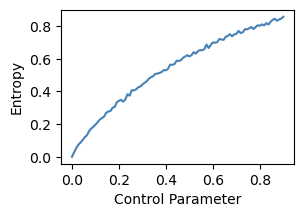

In [86]:
order_func = initial_distributions.entropy_topology_noscale

control_parameter_range = np.linspace(0.1, 1, 100)
order_parameters = []

for control_parameter in control_parameter_range:
    dist = initial_distributions.order_distribution(control_parameter,size=100)
    res = order_func(dist)
    order_parameters.append(res)


plt.figure(figsize=(12/4,8/4))
plt.plot(1-control_parameter_range, order_parameters,"steelblue")
plt.xlabel("Control Parameter")
plt.ylabel("Entropy")
# plt.title("Entropy vs. Control Parameter")
plt.savefig("entropy_vs_control_parameter", bbox_inches="tight", dpi=300, transparent=True)

### Real life topography

In [ ]:
size = 100
x,y = np.meshgrid(np.linspace(0, 1, size), np.linspace(0, 1, size))
mode = 'snow_dune'              # topography type
tmax = 2; dt = 0.1              # diffusion time and time-step if mode = 'diffusion' or mode = 'rayleigh'
g = 1                           # anisotropy parameter
sigma_h = 0.03                  # surface standard deviation
snow_dune_radius = 1.           # mean snow dune radius if mode = 'snow_dune'
Gaussians_per_pixel = 0.2       # density of snow dunes if mode = 'snow_dune'
snow_dune_height_exponent = 1.  # exponent that relates snow dune radius and snow dune height if mode = 'snow_dune'

mean_freeboard = 0.1

Tdrain = 10.; dt_drain = 0.5    # time and time-step of to drainage

# create topography
z = initial_distributions.Create_Initial_Topography(res = size, mode = mode, tmax = tmax, dt = dt, g = g, sigma_h = sigma_h, h = mean_freeboard, snow_dune_radius = snow_dune_radius,
            Gaussians_per_pixel = Gaussians_per_pixel, number_of_r_bins = 150, window_size = 5, snow_dune_height_exponent = snow_dune_height_exponent)



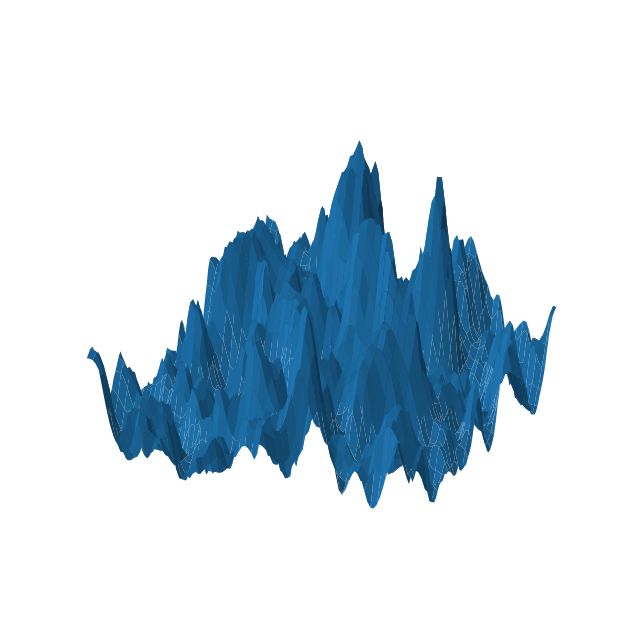

In [68]:
fig = plt.figure(figsize=(11,8))
ax2 = fig.add_subplot(111,projection="3d")
# ax2.plot_wireframe(x, y, z)
ax2.plot_surface(x, y, z)
plt.axis("off")
# plt.show()
plt.savefig(f"snow_dune",bbox_inches="tight", dpi=300, transparent=True)


Plot curve for Fractal dimension transition (should be 1 if

In [8]:
# def plot_curve():
"""
Plot the relationship of order and control parameter.
:return: None
"""
control_parameter_range = np.linspace(0.1, 1, 20)
entropys = []
order_parameters = []




In [9]:
iceing_test = iceing.iceing_model(0.45, 1000)
ponds, sums = iceing_test.run(15_000_000)

In [10]:
areas_ising, perimeters_ising = evaluation.perim_area(ponds, pond_val = -1, ice_val = 1)

Text(0, 0.5, 'perimeter [m]')

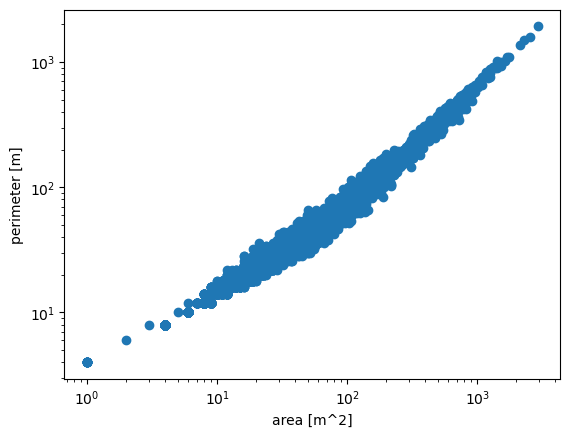

In [11]:
plt.scatter(areas_ising, perimeters_ising)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('area [m^2]')
plt.ylabel('perimeter [m]')

In [12]:
data

NameError: name 'data' is not defined

In [13]:
data = np.asarray([areas_ising, perimeters_ising]).T

# Calculate quartiles
lower_quartile = np.percentile(data, 30, axis=1)
upper_quartile = np.percentile(data, 70, axis=1)


def get_percentile_rows(data, column_index, percentile):
    # Sort the array based on the specified column
    sorted_data = data[data[:, column_index].argsort()]

    # Calculate the index corresponding to the specified percentile
    percentile_index = int(percentile * len(sorted_data))

    # Extract the rows based on the percentile index
    bottom_percentile_rows = sorted_data[:percentile_index]
    top_percentile_rows = sorted_data[::-1][:percentile_index]

    return bottom_percentile_rows, top_percentile_rows

In [14]:
np.allclose(bottom_percentile_rows,top_percentile_rows)

NameError: name 'bottom_percentile_rows' is not defined

2105
2105


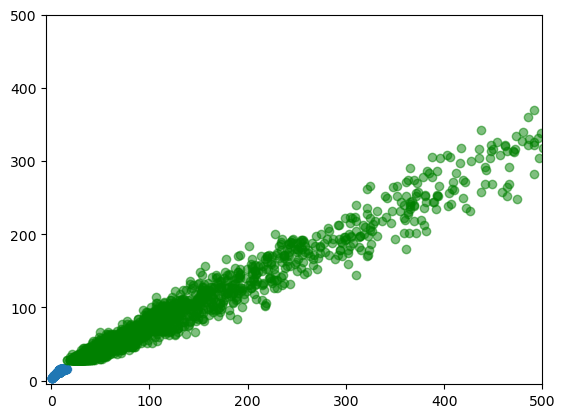

In [15]:
percentile = 0.3
sort_test = data[data[:, 1].argsort()]
idx = int(percentile*len(sort_test))
bottom = sort_test[:idx]
upper = sort_test[::-1][:idx]

bottom,upper = get_percentile_rows(sort_test,1,0.4)
print(len(bottom))
print(len(upper))
plt.figure()
plt.scatter(bottom[:,0],bottom[:,1],alpha=0.5)
plt.scatter(upper[:,0],upper[:,1],alpha=0.5, color="green")
# plt.xscale('log')
# plt.yscale('log')
plt.xlim((-5,500))
plt.ylim((-5,500))
plt.show()

def plot_regress(bottom, upper):
    regression_bottom = stats.linregress(bottom)
    regression_upper = stats.linregress(upper)
    plt.figure()
    plt.scatter(bottom[:,0],bottom[:,1],alpha=0.5)
    plt.scatter(upper[:,0],upper[:,1],alpha=0.5, color="green")
    # plt.xscale('log')
    # plt.yscale('log')
    plt.xlim((-5,500))
    plt.ylim((-5,500))
    plt.plot(bottom[:,0], regression_bottom.intercept + regression_bottom.slope*bottom[:,0], 'r', label='fitted line')
    plt.plot(upper[:,0], regression_upper.intercept + regression_upper.slope*upper[:,0], 'r', label='fitted line')
    plt.show()
    print(regression_bottom.slope,regression_upper.slope)

In [16]:
top_percentile_rows, bottom_percentile_rows = get_percentile_rows(data,1,5)

Text(0, 0.5, 'perimeter [m]')

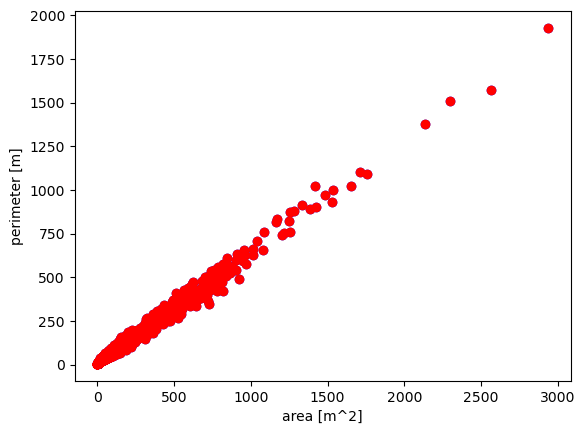

In [17]:
plt.scatter(top_percentile_rows[:,0], top_percentile_rows[:,1],color="blue")
plt.scatter(bottom_percentile_rows[:,0], bottom_percentile_rows[:,1],color="red")
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('area [m^2]')
plt.ylabel('perimeter [m]')

In [18]:
def compare_slopes(lm1, lm2):
    """
    T-test between 2 regression slopes.
    Based on:
    Paternoster, R., Brame, R., Mazerolle, P., & Piquero, A. R. (1998).
    Using the Correct Statistical Test for the Equality of Regression
    Coefficients. Criminology, 36(4), 859–866.

    :param lm1:
    :param lm2:
    :return:
    """
    b1, sterr1 = lm1.slope, lm1.stderr
    b2, sterr2 = lm2.slope, lm2.stderr
    z = (b1-b2)/ np.sqrt(sterr1**2 + sterr2**2)
    p_val = stats.norm.sf(abs(z))
    return z, p_val

In [19]:
compare_slopes(regression_upper,regression_bottom)

NameError: name 'regression_upper' is not defined

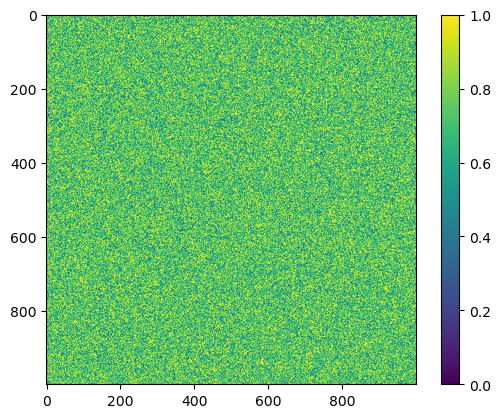

1


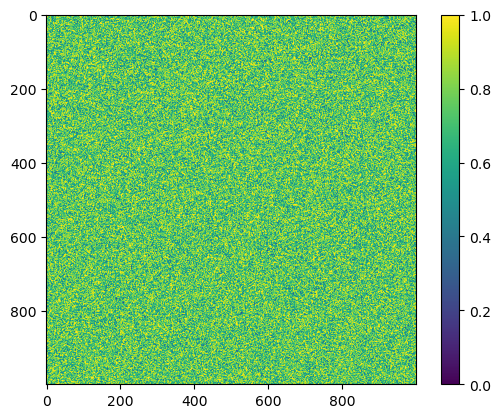


KeyboardInterrupt



In [40]:
def main_topography_change_order(size = 1000):
    control_parameter_range = np.linspace(0.1, 1, 20)
    # control_parameter_range = [0]
    entropys = []
    order_parameters = []
    percentile = .3
    for control_parameter in control_parameter_range:
        # distribution
        dist = initial_distributions.order_distribution(control_parameter,size=size)

        # model

        h_norm = dist
        h_norm = resize(h_norm, (size, size))
        h_norm = np.heaviside(h_norm-0.8, 0) * h_norm
        h = h_norm
        plt.figure()
        plt.imshow(h_norm)
        plt.colorbar()
        plt.show()
        # evaluation
        entropys.append(evaluation.entropy_v4(dist,size))
        areas, perimeters = evaluation.perim_area(np.where(h<=0,1,-1), pond_val = -1, ice_val = 1)
        data = np.asarray([areas, perimeters]).T


        top_percentile_rows, bottom_percentile_rows = get_percentile_rows(data, 1, percentile)

        try:
            regression_bottom = stats.linregress(bottom_percentile_rows)
            regression_upper = stats.linregress(top_percentile_rows)
            z, p_val = compare_slopes(regression_upper,regression_bottom)
        except:
            # Did not find enough clusters to build regression, so the few we have must be simple.
            p_val = 1
        print(p_val)

        order_parameters.append(p_val)
    return control_parameter_range, order_parameters, entropys

control_parameter_range, order_parameters, entropys = main_topography_change_order()

In [25]:
order_parameters, entropys

([1.813702141275742e-23], [0.0427649432461296])

In [37]:
order_parameters[3]

1.884963325653752e-05

In [ ]:
plt.figure(figsize=(11/2,8/2))
plt.plot(control_parameter_range, order_parameters,"steelblue", label="order paramter")
# plt.plot(control_parameter_range, entropys,"orange", label="entropy")
plt.xlabel("Control Parameter")
plt.ylabel("Order Parameter")
plt.title("Order Parameter vs Control Parameter")
plt.legend()
plt.savefig("order_vs_control parameter", bbox_inches="tight", dpi=300,transparent=True)

In [38]:
control_parameter_range1, order_parameters1, entropys1 = control_parameter_range, order_parameters, entropys

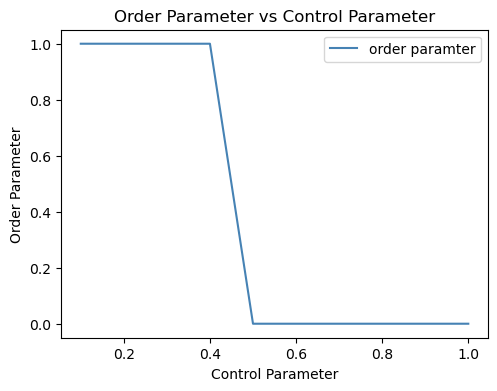

In [79]:
plt.figure(figsize=(11/2,8/2))
plt.plot(control_parameter_range1, 1-np.array(order_parameters1),"steelblue", label="order paramter")
# plt.plot(control_parameter_range, entropys,"orange", label="entropy")
plt.xlabel("Control Parameter")
plt.ylabel("Order Parameter")
plt.title("Order Parameter vs Control Parameter")
plt.legend()
plt.savefig("order_vs_control parameter", bbox_inches="tight", dpi=300,transparent=True)

In [ ]:
size = 1000
h_norm = dist
h_norm = resize(h_norm, (size, size))
h_norm = np.heaviside(h_norm-0.7, 0) * h_norm
plt.imshow(np.where(h_norm<=0, 1,-1)[:200,:200])
plt.colorbar()

----------------

In [ ]:
# fractal dimension plot
size = 10
h = np.random.normal(loc = 0.5, scale = 1, size = (int(size/5), int(size/5)))
h = resize(h, (size, size))

h, X, Y = initial_distributions.multi_valley(size=size)

In [ ]:
h.shape

In [ ]:
# # %matplotlib notebook
# fig = plt.figure()
# ax = fig.add_subplot(132, projection = '3d')
# ax.plot_surface(X, Y, h, cmap = 'viridis')
# plt.xlabel("x1")
# plt.ylabel("x2")
# plt.tight_layout()
# plt.show()

In [ ]:

# Generate example cellular automaton data
# h = np.random.randint(0, 10, size=(10, 10))
# h, X, Y = initial_distributions.multi_valley(size=10)
#
# # Create a meshgrid for x, y coordinates
# x, y = np.meshgrid(np.arange(h.shape[1]), np.arange(h.shape[0]))
#
# # Flatten the arrays to create bars in the 3D plot
# x = x.flatten()
# y = y.flatten()
# z = np.zeros_like(x)
# dx = dy = 0.8
# dz = h.flatten()
#
# # Create a figure and 3D axis
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
#
# # Plot the bars
# ax.bar3d(x, y, z, dx, dy, dz)
#
# # Set labels and title
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.set_title('Cellular Automaton')
#
# # Show the plot
# plt.show()


In [ ]:

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def draw_3d_CA():
    sidelen = 15
    np.random.seed(100)

    # Generate example cellular automaton data
    H, X, Y = initial_distributions.multi_valley(size=sidelen)
    h = H * np.random.random() # water
    H = H*2
    # Create a meshgrid for x, y coordinates
    x, y = np.meshgrid(np.arange(H.shape[1]), np.arange(H.shape[0]))

    # Flatten the arrays to create bars in the 3D plot
    x = x.flatten()
    y = y.flatten()
    z = np.zeros_like(x)
    z, _, _ = initial_distributions.multi_valley(size = sidelen)
    z = z.flatten()* np.random.random()*1.3
    dx = dy = 0.8
    dz = H.flatten()
    dz2 = h.flatten()
    fig = plt.figure(figsize=(8,8))

    ax = fig.add_subplot(111, projection='3d')
    ax.grid(False)
    ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

    plt.axis('off')

    nonzero_indices = dz > 0
    nonzero_indices2 = dz2 > 0

    # Ice
    ax.bar3d(x[nonzero_indices], y[nonzero_indices], z[nonzero_indices],
             dx, dy, dz[nonzero_indices]+.38, color='linen', shade=True,alpha=1) # +.3 azure, seashell,linen
    # Water
    ax.bar3d(x[nonzero_indices2], y[nonzero_indices2], dz[nonzero_indices]+.4,
             dx, dy, dz2[nonzero_indices2], color='steelblue', shade=True,alpha=.4)

    ax.view_init(elev=30, azim=360-37)
    # ax.view_init(elev=70, azim=360-60)
    plt.gca().invert_xaxis()
    # plt.savefig("Ice_column_ca")
    plt.show()

Order

In [ ]:
import scipy.stats as stats

In [ ]:
size = 100
z = initial_distributions.order_distribution(0.4,100)
x,y = np.meshgrid(np.linspace(0, 1, size), np.linspace(0, 1, size))

fig = plt.figure(figsize=(11,8))
ax2 = fig.add_subplot(111,projection="3d")
ax2.plot_wireframe(x, y, z, rstride=15, cstride=15)
# order1 = initial_distributions.calculate_order_parameter(distribution=z)
# plt.title(f"Order: {round(order1,4)}")
plt.title(f"Entropy: {round(entropy_v2(z),4)}")
plt.show()
print(entropy_v2(z))

- ideas: transform input distribution s.t. probabilities for all values sum up to 1

Order

In [ ]:
import scipy.stats as stats
from sklearn.neighbors import KernelDensity
import sklearn


# Generate random samples from a normal distribution
def entropy_v2(samples):
    """C-GPT version."""
    flattened_samples = samples.flatten()
    # Perform kernel density estimation (KDE)
    kde = KernelDensity(kernel='gaussian').fit(flattened_samples.reshape(-1, 1))
    probabilities = np.exp(kde.score_samples(flattened_samples.reshape(-1, 1)))
    probabilities /= np.sum(probabilities)
    entropy_value = stats.entropy(probabilities)
    return entropy_value

def entropy_v2_5(data):
    """Possibly wrong stackoverflow version."""
    data_norm = np.sqrt(np.sum(data * data, axis=1))
    data = data / data_norm[:, None]  # Normalized data to be on unit sphere

    ## estimate pdf using KDE with gaussian kernel
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(data)

    log_p = kde.score_samples(data)  # returns log(p) of data sample
    p = np.exp(log_p)  # estimate p of data sample
    entropy = -np.sum(p * log_p)
    return entropy

def entropy_v3(X):
    """Likely correct stackoverflow version."""
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)
    params = {'bandwidth': np.logspace(-10, 10, 20)}
    gs = sklearn.model_selection.GridSearchCV(KernelDensity(), params)
    gs.fit(X)
    kde = gs.best_estimator_
    log_probs = kde.score_samples(X)
    return -np.mean(log_probs)



In [ ]:


def plot_curve(order_func):
    """
    Plot the relationship of order and control parameter.
    :return: None
    """
    control_parameter_range = np.linspace(0.1, 1, 20)
    entropys = []
    order_parameters = []


    for control_parameter in control_parameter_range:
        dist = initial_distributions.order_distribution(control_parameter,size=100)
        entropys.append(entropy_v4_noscale(dist))


        res = fractal_dim
        order_parameters.append(fractal_dim)




    plt.figure(figsize=(11/2,8/2))
    plt.plot(control_parameter_range, order_parameters,"steelblue", label="order paramter")
    plt.plot(control_parameter_range, entropys,"orange", label="entropy")
    plt.xlabel("Control Parameter")
    plt.ylabel("Order Parameter")
    plt.title("Order Parameter vs Control Parameter")
    plt.legend()
    plt.savefig("order_vs_control parameter", bbox_inches="tight", dpi=300,transparent=True)


In [ ]:
plot_curve(entropy_v4)

In [ ]:
size = 100
z = initial_distributions.order_distribution(1,size)
x,y = np.meshgrid(np.linspace(0, 1, size), np.linspace(0, 1, size))

fig = plt.figure(figsize=(11,8))
ax2 = fig.add_subplot(111,projection="3d")
ax2.plot_wireframe(x, y, z, rstride=15, cstride=15)
order = round(entropy_v4(z),4)
plt.title(f"Order: {order}")
plt.axis("off")
# plt.savefig(f"3d_{order}.png",bbox_inches="tight", dpi=300, transparent=True)
plt.show()
print(entropy_v4(z))

- ideas: transform input distribution s.t. probabilities for all values sum up to 1

In [ ]:
def plot_entropy_curve():
    """
    Plot the relationship of order and control parameter.
    :return: None
    """
    control_parameter_range = np.linspace(0.1, 1, 20)
    order_parameters = []

    for control_parameter in control_parameter_range:
        dist = initial_distributions.order_distribution(control_parameter,size=100)
        entropy = entropy_v2_5(dist)
        order_parameters.append(entropy)


    plt.figure(figsize=(12/2,8/2))
    plt.plot(control_parameter_range, order_parameters,"steelblue")
    plt.xlabel("Control Parameter")
    plt.ylabel("Order Parameter")
    plt.title("Order Parameter vs Control Parameter")
    plt.savefig("order_vs_control parameter", bbox_inches="tight", dpi=300)

plot_entropy_curve()

In [ ]:
# def order_distribution(control_parameter,size):
#     """
#     Generate distribution with some order value.
#     Log(control_parameter) maps linearly to the entropy-based order parameter.
#     :param control_parameter (float): In [0,1]. Determins the order of the topology.
#     :param size (int): Sidelength of the topology.
#     :return (2d np.array): Topology; z-lattice only.
#     """
#
#     random_distribution = np.random.random((size, size))
#     uniform = np.zeros((size, size))
#     num_elements = int(size * size * control_parameter)
#     indices = np.random.choice(size * size, size=num_elements, replace=False)
#     uniform.flat[indices] = random_distribution.flat[indices]
#     return uniform

In [ ]:
# def order_distribution(control_parameter,size):
#     """
#     Generate distribution with some order value.
#     Log(control_parameter) maps linearly to the entropy-based order parameter.
#     :param control_parameter (float): In [0,1]. Determins the order of the topology.
#     :param size (int): Sidelength of the topology.
#     :return (2d np.array): Topology; z-lattice only.
#     """
#
#     random_distribution = np.random.random((size, size))
#     uniform = np.zeros((size, size))
#     num_elements = int(size * size * control_parameter)
#     indices = np.random.choice(size * size, size=num_elements, replace=False)
#     uniform.flat[indices] = random_distribution.flat[indices]
#     return uniform

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
size = 100  # Size of the grid
control_parameter = 1  # Desired order parameter value (0 for fully uniform, 1 for fully random)

# Generate a uniform grid
grid = np.meshgrid(np.linspace(0, 1, size), np.linspace(0, 1, size))


import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# def calculate_order_parameter(distribution=None, control_parameter=None, size=100):
#     """
#     Calculate the order parameter for a given control parameter or 2d Distribution.
#     Order parameter is transformed mean entropy of the system.
#     Scales linearly with control parameter. Is min-max scaled.
#     :param control_parameter (float): The control parameter that influences the level of order.
#     :return: Order parameter value.
#     """
#     if distribution is None and control_parameter is None:
#         print(control_parameter)
#         raise Exception("Provide either an input distribution or a control parameter.")
#     if distribution:
#         assert len(distribution.shape) == 2, "Input distribution is not 2D."
#         size = len(distribution)
#     if control_parameter:
#         random_distribution = np.random.random((size, size))
#         distribution = np.zeros((size, size))
#         num_elements = int(size * size * control_parameter)
#         indices = np.random.choice(size * size, size=num_elements, replace=False)
#         distribution.flat[indices] = random_distribution.flat[indices]
#
#     order_parameter = (np.nanmean(stats.entropy(distribution)))
#     min_order = 2.05625
#     max_order = 4.41097
#     return (order_parameter - min_order) / (max_order - min_order) * (np.log(100)/np.log(size))

def plot_control_order_curve():
    """
    Plot the relationship of order and control parameter.
    :return: None
    """
    control_parameter_range = np.linspace(0.1, 1, 20)
    order_parameters = []

    for control_parameter in control_parameter_range:
        order_parameter = initial_distributions.calculate_order_parameter(control_parameter=control_parameter)
        order_parameters.append(order_parameter)


    print(order_parameters)
    plt.figure(figsize=(12/2,8/2))
    plt.plot(control_parameter_range, order_parameters,"steelblue")
    plt.xlabel("Control Parameter")
    plt.ylabel("Order Parameter")
    plt.title("Order Parameter vs Control Parameter")
    plt.savefig("order_vs_control parameter", bbox_inches="tight", dpi=300)

plot_control_order_curve()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mticker
from matplotlib.ticker import LinearLocator
import numpy as np
# z = initial_distributions.order_distribution((1-.2),100)
# x,y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(x, y, np.log10(z), cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)
#
# ax1.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
# ax1.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
# ax1.set(title="Logarithmic z-axis (much better)")
# # fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.mplot3d import axes3d
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"
x,y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
control1 = 1
z_one = initial_distributions.order_distribution(control1,100)
fig = plt.figure(figsize=(11,8))
ax2 = fig.add_subplot(111,projection="3d")
plt.axis("off")
ax2.plot_wireframe(x, y, np.log10(z_one), rstride=15, cstride=15)
# order1 = (np.nanmean(stats.entropy(z_one)))
order1 = initial_distributions.calculate_order_parameter(distribution=z_one)
plt.title(f"Order: {round(order1,2)}")
plt.show()
# plt.savefig(f"Orderlattice_{order1}.png", bbox_inches='tight')

In [ ]:
(np.nanmean(stats.entropy(z_one)))

In [ ]:
order_parameter = (np.nanmean(stats.entropy(z_one)))
min_order = 2.05625
max_order = 4.41097
(order_parameter - min_order) / (max_order - min_order) * (np.log(100) / np.log(size))

In [ ]:
raise KeyboardInterrupt
z = initial_distributions.Create_Initial_Topography(res=100, sigma_h=1e-8)
z = initial_distributions.luetje_initial_cond()[:, :-2]
rng = np.random.default_rng()
z = rng.
size = len(z)
x = np.linspace(0, 1, num=size)
y = np.linspace(0, 1, num=size)
X, Y = np.meshgrid(x, y)

In [ ]:
control_parameter = 1
random_distribution = np.random.random((size, size))
uniform = np.full((size, size), fill_value=0.5)
num_elements = int(size * size * (1-control_parameter))
indices = np.random.choice(size * size, size=num_elements, replace=False)
uniform.flat[indices] = random_distribution.flat[indices]

In [ ]:
uniform